# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fiyanda Ma'muri
- **Email:** fiyandamamuri@gmail.com
- **ID Dicoding:** fiyandamamuri

## Menentukan Pertanyaan Bisnis
- Pertanyaan 1 : Di kota mana mayoritas pelanggan berasal, dan bagaimana distribusi jumlah pelanggan di 5 kota teratas dibandingkan dengan kota lainnya? Apa implikasi dari data ini untuk strategi pemasaran perusahaan, seperti penempatan promosi lokal atau ekspansi operasional?

- Pertanyaan 2 : Apa saja metode pembayaran yang paling banyak digunakan oleh pelanggan, dan seberapa besar kontribusi setiap metode terhadap total transaksi? Berdasarkan distribusi ini, bagaimana perusahaan dapat mengoptimalkan layanan pembayaran untuk meningkatkan pengalaman pelanggan?

- Pertanyaan 3 : Bagaimana tren jumlah pesanan dari waktu ke waktu (per bulan), dan apakah ada pola musiman atau kenaikan/penurunan yang signifikan selama periode tertentu? Apa strategi yang bisa diterapkan berdasarkan tren ini, misalnya untuk promosi musiman atau pengelolaan inventaris?

- Pertanyaan 4 : Kategori produk apa yang paling populer di antara pelanggan, dan bagaimana distribusi 5 kategori teratas dibandingkan dengan kategori lainnya? Bagaimana hasil ini dapat digunakan untuk pengelolaan produk atau strategi pemasaran perusahaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# !git clone https://github.com/fiyandamamuri/e-commerce_public_datasets_analysis.git

In [3]:
df_item = pd.read_csv("datasets\order_items_dataset.csv")
df_reviews = pd.read_csv("datasets\order_reviews_dataset.csv")
df_orders = pd.read_csv("datasets\orders_dataset.csv")
df_products = pd.read_csv("datasets\products_dataset.csv")
df_geolocation = pd.read_csv("datasets\geolocation_dataset.csv")
df_sellers = pd.read_csv("datasets\sellers_dataset.csv")
df_order_pay = pd.read_csv("datasets\order_payments_dataset.csv")
df_customers = pd.read_csv("datasets\customers_dataset.csv")
df_category = pd.read_csv("datasets\product_category_name_translation.csv")

In [4]:
df_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [5]:
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [6]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [7]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [8]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [9]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [10]:
df_order_pay

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [11]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [12]:
df_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


### Assessing Data

In [13]:
print("order_items_datasets")
df_item.info()
print()
df_item.describe()

order_items_datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB



,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [14]:
print("order_reviews_dataset")
df_reviews.info()
print()
df_reviews.describe()

order_reviews_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB



,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [15]:
print("orders_datasets")
df_orders.info()
print()
df_orders.describe()


orders_datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [16]:
print("products_datasets")
df_products.info()
print()
df_products.describe()

products_datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB



,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [17]:
print("geolocation_datasets")
df_geolocation.info()
print()
df_geolocation.describe()

geolocation_datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [18]:
print("sellers_datasets")
df_sellers.info()
print()
df_sellers.describe()

sellers_datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB



,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [19]:
print("order_payments_datasets")
df_order_pay.info()
print()
df_order_pay.describe()

order_payments_datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB



,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [20]:
print("customer_datasets")
df_customers.info()
print()
df_customers.describe()

customer_datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB



,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [21]:
print("product_category_name_translation")
df_category.info()
print()
df_category.describe()

product_category_name_translation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB



,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [22]:
# mengecek missing values
for df, name in zip(
    [df_item, df_reviews, df_orders, df_products, df_geolocation,
     df_sellers, df_order_pay, df_customers, df_category],
    ["df_item", "df_reviews", "df_orders", "df_products",
     "df_geolocation", "df_sellers", "df_order_pay", "df_customers", "df_category"]
):
    print(f"{name} Missing Values:\n{df.isnull().sum()}\n")

df_item Missing Values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

df_reviews Missing Values:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

df_orders Missing Values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

df_products Missing Values:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product

In [23]:
# Mengecek jumlah duplikat
for df, name in zip(
    [df_item, df_reviews, df_orders, df_products, df_geolocation,
     df_sellers, df_order_pay, df_customers, df_category],
    ["df_item", "df_reviews", "df_orders", "df_products",
     "df_geolocation", "df_sellers", "df_order_pay", "df_customers", "df_category"]
):
    duplicates = df.duplicated().sum()
    print(f"{name} Duplicates: {duplicates}")


df_item Duplicates: 0
df_reviews Duplicates: 0
df_orders Duplicates: 0
df_products Duplicates: 0
df_geolocation Duplicates: 261831
df_sellers Duplicates: 0
df_order_pay Duplicates: 0
df_customers Duplicates: 0
df_category Duplicates: 0


In [24]:
# Standardisasi Format Kolom
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date'])

In [25]:
# merge data df_products dengan product_category_name
df_products = df_products.merge(df_category, on='product_category_name', how='left')

**Insight:**
- `df_item`, `df_geolocation`, `df_sellers`, `df_order_pay`, `df_customers` `df_category`  tidak ada nilai hilang, tidak perlu tindakan. sedangkan `df_reviews`, `df_orders`, `df_products` memiliki nilai hilang maka perlu tindakan.

- Dari output di atas, hanya dataset `df_geolocation` yang memiliki duplikat dengan jumlah 261831, sementara dataset lainnya tidak memiliki duplikat. namun duplicate pada `df_geolocation` tidak di remove dikarenakan `df_geolocation` merupakan bukan data unik.

### Cleaning Data

#### handling missing values

`df_item`, `df_geolocation`, `df_sellers`, `df_order_pay`, `df_customers` `df_category`  tidak ada nilai hilang, tidak perlu tindakan.

`df_reviews`:

Nilai hilang pada kolom teks diisi dengan string "No Title" atau "No Message" agar tetap konsisten.

In [26]:
# Handle missing values for df_reviews
df_reviews['review_comment_title'] = df_reviews['review_comment_title'].fillna("No Title")
df_reviews['review_comment_message'] = df_reviews['review_comment_message'].fillna("No Message")

`df_orders`:

- Untuk tanggal persetujuan (`order_approved_at`), asumsi digunakan bahwa jika kosong, waktu persetujuan sama dengan waktu pembelian.
- Tanggal pengiriman yang hilang (`order_delivered_carrier_date`, `order_delivered_customer_date`) dianggap belum dikirim, sehingga diisi dengan NaT.

In [27]:
# Handle missing values for df_orders
df_orders['order_approved_at'] = df_orders['order_approved_at'].fillna(df_orders['order_purchase_timestamp'])
df_orders['order_delivered_carrier_date'] = df_orders['order_delivered_carrier_date'].fillna(pd.NaT)
df_orders['order_delivered_customer_date'] = df_orders['order_delivered_customer_date'].fillna(pd.NaT)

`df_products`:

- Nilai hilang pada kolom numerik diisi dengan nilai median untuk menghindari bias.
- Kolom `product_category_name` diisi dengan "Unknown" untuk menandai category yang tidak diketahui.
- `product_description_lenght`, `product_photos_qty` diisi dengan 0 jika kosong.

In [28]:
# Handle missing values for df_products
numerical_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in numerical_cols:
    df_products[col] = df_products[col].fillna(df_products[col].median())

df_products['product_category_name'] = df_products['product_category_name'].fillna("Unknown")
df_products['product_name_lenght'] = df_products['product_name_lenght'].fillna(0)
df_products['product_description_lenght'] = df_products['product_description_lenght'].fillna(0)
df_products['product_photos_qty'] = df_products['product_photos_qty'].fillna(0)

In [29]:
df_orders.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [30]:
print(df_orders.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


In [31]:
# Menghapus baris berdasarkan index
df_orders.drop(df_orders[df_orders["order_status"].isin(["canceled", "unavailable"])].index, inplace=True)

# Cek hasil setelah filter
df_orders["order_status"].value_counts()

order_status
delivered     96478
shipped        1107
invoiced        314
processing      301
created           5
approved          2
Name: count, dtype: int64

In [32]:
df_reviews.to_csv("datasets/df_reviews_cleaned.csv", index=False)
df_orders.to_csv("datasets/df_orders_cleaned.csv", index=False)
df_products.to_csv("datasets/df_products_cleaned.csv", index=False)

In [33]:
df_reviews_cleaned = pd.read_csv("datasets/df_reviews_cleaned.csv")
df_orders_cleaned = pd.read_csv("datasets/df_orders_cleaned.csv")
df_products_cleaned = pd.read_csv("datasets/df_products_cleaned.csv")

In [34]:
# Gabungkan df_orders dengan df_order_pay berdasarkan order_id
merged_df = pd.merge(df_orders_cleaned, df_order_pay, on='order_id', how='inner')

# Gabungkan dengan df_item untuk mendapatkan informasi produk yang dibeli
merged_df = pd.merge(merged_df, df_item, on='order_id', how='inner')

# Gabungkan dengan df_products berdasarkan product_id untuk mendapatkan detail produk
merged_df = pd.merge(merged_df, df_products_cleaned, on='product_id', how='inner')

# Gabungkan dengan df_customers berdasarkan customer_id untuk mendapatkan informasi pelanggan
merged_df = pd.merge(merged_df, df_customers, on='customer_id', how='inner')

# saved datasets
merged_df.to_csv("dashboard/datasets_cleaned.csv", index=False)

In [35]:
# Load dataset
df = pd.read_csv("dashboard/datasets_cleaned.csv")

**Insight:**
handle missing values, dan formatting sudah dilakukan,selanjutnya tahap Exploratory Data Analysis (EDA)

## Exploratory Data Analysis (EDA)

###  distribusi data kontinu (Histograms)

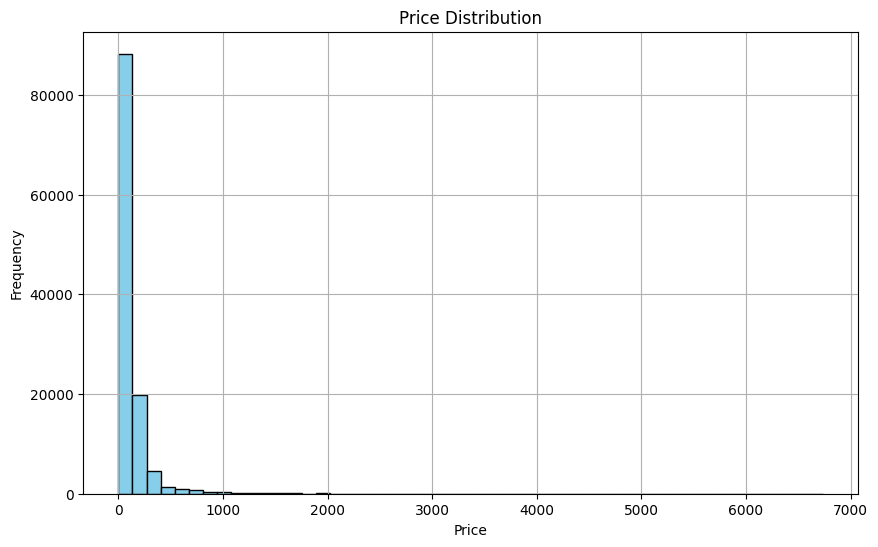

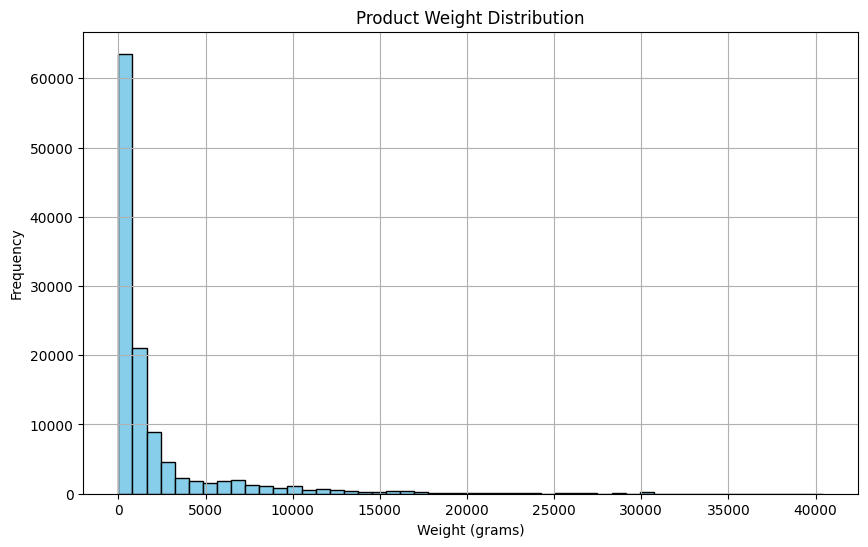

In [36]:
plt.figure(figsize=(10, 6))
df['price'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
df['product_weight_g'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Product Weight Distribution')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.show()

- Produk dengan harga rendah lebih banyak dijual dibandingkan produk mahal.
- Sebagian besar produk berukuran kecil atau ringan.

### distribusi fitur kategorikal (bar plot)

C:\Users\fiyan\AppData\Local\Temp\ipykernel_22576\456128097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews_cleaned, y='review_score', palette="viridis")


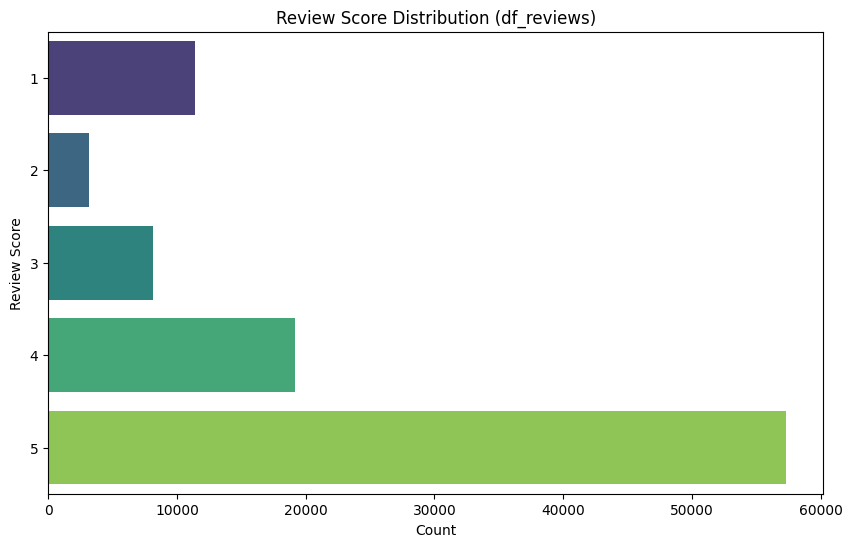

C:\Users\fiyan\AppData\Local\Temp\ipykernel_22576\456128097.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_orders_cleaned, y='order_status', palette="viridis")


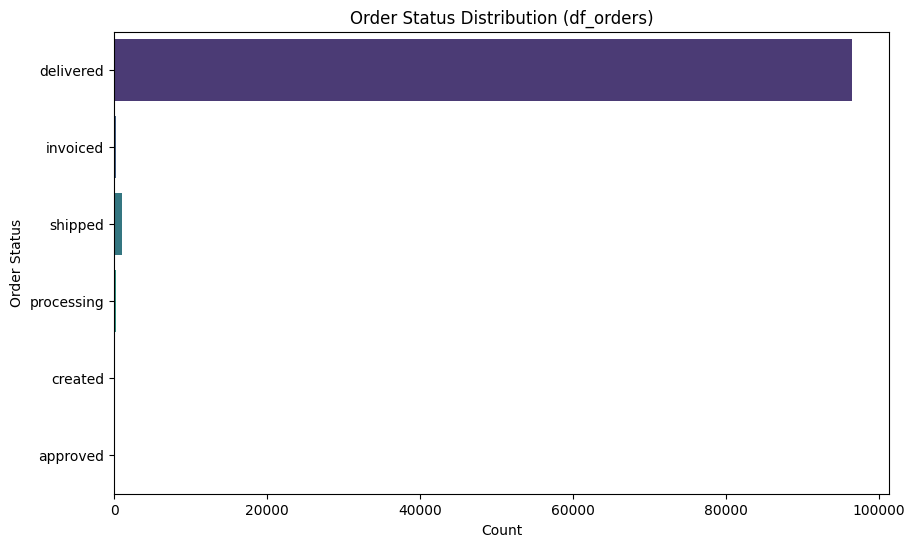

In [37]:
#Explore data Distribusi Skor Ulasan (review_score) pada df_reviews dan Distribusi Status Pesanan (order_status) pada df_orders

plt.figure(figsize=(10, 6))
sns.countplot(data=df_reviews_cleaned, y='review_score', palette="viridis")
plt.title('Review Score Distribution (df_reviews)')
plt.xlabel('Count')
plt.ylabel('Review Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_orders_cleaned, y='order_status', palette="viridis")
plt.title('Order Status Distribution (df_orders)')
plt.xlabel('Count')
plt.ylabel('Order Status')
plt.show()

-  pelayanan secara umum sudah baik, tetapi masih ada beberapa pelanggan yang mengalami pengalaman negatif.
- Sistem pengiriman berjalan dengan baik, karena mayoritas pesanan berhasil dikirim.

### Menghitung korelasi antar fitur numerik produk (heatmap)

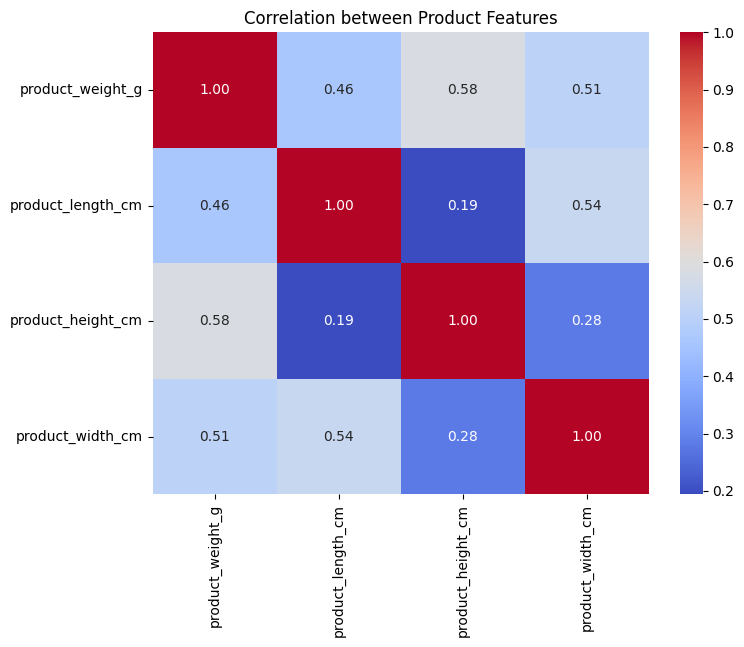

In [38]:
# Correlation Heatmap
corr = df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Product Features')
plt.show()

Berdasarkan heatmap korelasi, terdapat hubungan sedang antara berat produk (product_weight_g) dengan dimensi produk lainnya, seperti tinggi (product_height_cm), lebar (product_width_cm), dan panjang (product_length_cm). Korelasi tertinggi terlihat antara berat dan tinggi produk (0.58), menunjukkan bahwa produk yang lebih berat cenderung lebih tinggi. Selain itu, panjang dan lebar produk memiliki korelasi sebesar 0.54, yang mengindikasikan bahwa produk yang lebih panjang umumnya juga lebih lebar. Sebaliknya, panjang dan tinggi memiliki korelasi paling rendah (0.19), menunjukkan bahwa keduanya tidak terlalu berhubungan. Hasil ini dapat digunakan untuk memahami pola dimensi produk dalam pengemasan atau pengelolaan logistik.

### Insight Geolocation (5 Kota dengan Pelanggan Terbanyak)

In [39]:
# 5 kota dengan jumlah pelanggan terbanyak berdasarkan dataset df_customers

top_cities = (
    df.groupby("customer_city")["customer_unique_id"]
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"customer_unique_id": "unique_customers"})
    .head(5)  # Mengambil 5 kota teratas
)

top_cities

,customer_city,unique_customers
0,sao paulo,14761
1,rio de janeiro,6545
2,belo horizonte,2641
3,brasilia,2051
4,curitiba,1447


### Distribusi Jenis Pembayaran

In [41]:
# Analisis Distribusi Metode Pembayaran

payment_type_distribution = df['payment_type'].value_counts()

print("\nPayment Type Distribution:")
print(payment_type_distribution)



Payment Type Distribution:
payment_type
credit_card    86327
boleto         22771
voucher         6245
debit_card      1685
Name: count, dtype: int64


### Tren Waktu (Pesanan per Bulan)

In [42]:
# Konversi kolom order_purchase_timestamp ke datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Menghitung jumlah pesanan per bulan
orders_by_month = (
    df['order_purchase_timestamp']
    .dt.to_period('M')
    .value_counts()
    .sort_index()
)

# Tampilkan hasil
print("\nTren Pesanan per Bulan:")
print(orders_by_month)
# Menghitung jumlah pesanan per bulan
orders_by_month = (
    df['order_purchase_timestamp']
    .dt.to_period('M')
    .value_counts()
    .sort_index()
)

# Tampilkan hasil
print("\nTren Pesanan per Bulan:")
print(orders_by_month)


Tren Pesanan per Bulan:
order_purchase_timestamp
2016-09       2
2016-10     360
2016-12       1
2017-01    1003
2017-02    2047
2017-03    3156
2017-04    2831
2017-05    4365
2017-06    3769
2017-07    4806
2017-08    5139
2017-09    5083
2017-10    5543
2017-11    8977
2017-12    6556
2018-01    8509
2018-02    7844
2018-03    8521
2018-04    8243
2018-05    8194
2018-06    7372
2018-07    7277
2018-08    7429
2018-09       1
Freq: M, Name: count, dtype: int64

Tren Pesanan per Bulan:
order_purchase_timestamp
2016-09       2
2016-10     360
2016-12       1
2017-01    1003
2017-02    2047
2017-03    3156
2017-04    2831
2017-05    4365
2017-06    3769
2017-07    4806
2017-08    5139
2017-09    5083
2017-10    5543
2017-11    8977
2017-12    6556
2018-01    8509
2018-02    7844
2018-03    8521
2018-04    8243
2018-05    8194
2018-06    7372
2018-07    7277
2018-08    7429
2018-09       1
Freq: M, Name: count, dtype: int64


### Analisis Produk

In [40]:
# Analisis Kategori Produk dalam kolom product_category_name_english

top_categories = df['product_category_name_english'].value_counts().head(5)

print("\nTop 5 Product Categories:")
print(top_categories)



Top 5 Product Categories:
product_category_name_english
bed_bath_table           11805
health_beauty             9932
sports_leisure            8893
furniture_decor           8707
computers_accessories     8036
Name: count, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Di kota mana mayoritas pelanggan berasal, dan bagaimana distribusi jumlah pelanggan di 5 kota teratas dibandingkan dengan kota lainnya? Apa implikasi dari data ini untuk strategi pemasaran perusahaan, seperti penempatan promosi lokal atau ekspansi operasional?

C:\Users\fiyan\AppData\Local\Temp\ipykernel_22576\1115470588.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x="unique_customers", y="customer_city", palette="viridis")


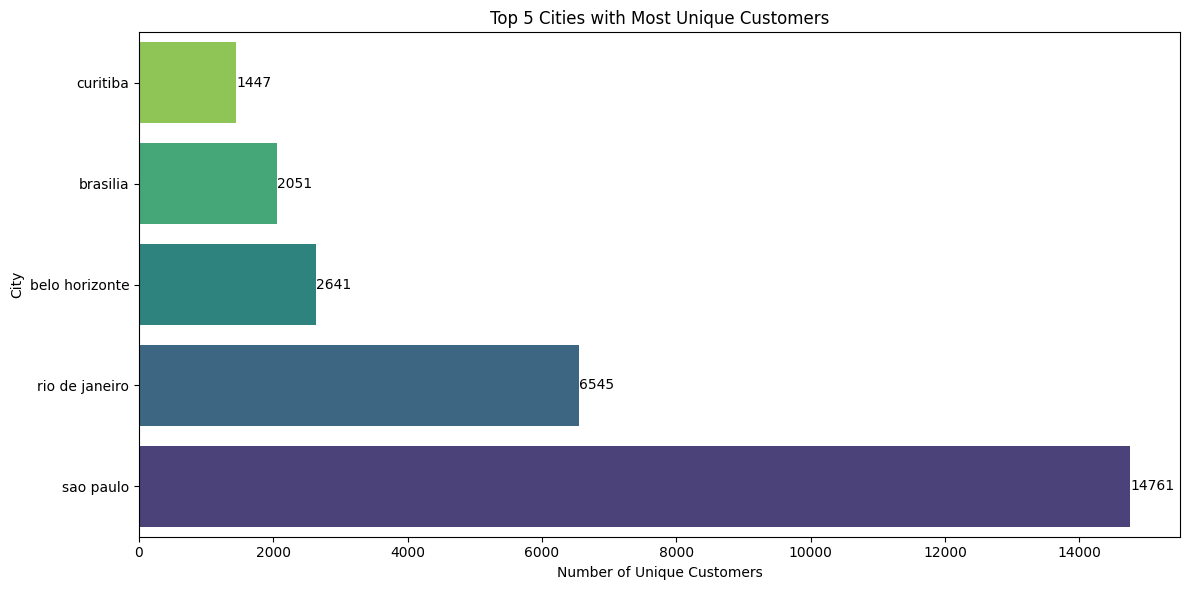

In [43]:
# Top 5 Cities with Most Customers

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x="unique_customers", y="customer_city", palette="viridis")

# Menambahkan detail jumlah di dalam chart
for index, value in enumerate(top_cities["unique_customers"]):
    plt.text(value + 2, index, str(value), va='center', fontsize=10)

plt.title('Top 5 Cities with Most Unique Customers')
plt.xlabel('Number of Unique Customers')
plt.ylabel('City')
plt.gca().invert_yaxis()  # Membalikkan urutan untuk ranking
plt.tight_layout()
plt.show()

### Pertanyaan 2:
Apa saja metode pembayaran yang paling banyak digunakan oleh pelanggan, dan seberapa besar kontribusi setiap metode terhadap total transaksi? Berdasarkan distribusi ini, bagaimana perusahaan dapat mengoptimalkan layanan pembayaran untuk meningkatkan pengalaman pelanggan?

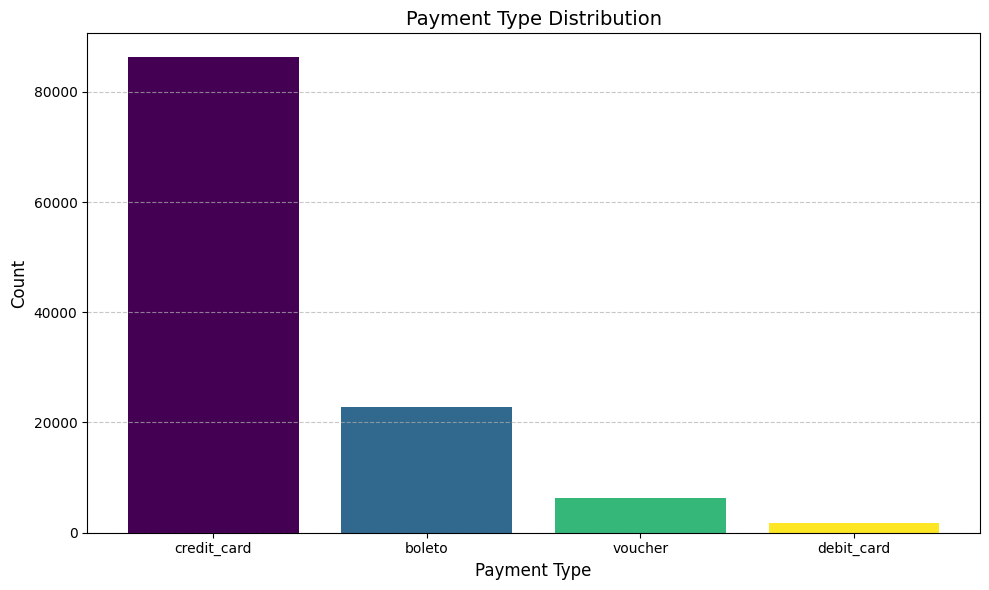

In [44]:
# Membuat visualisasi menggunakan bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(payment_type_distribution.index, payment_type_distribution.values, color=plt.cm.viridis(np.linspace(0, 1, len(payment_type_distribution))))

# Menambahkan label jumlah di atas tiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5,  # Posisi teks
             str(bar.get_height()),  # Teks yang ditampilkan
             ha='center', va='bottom', fontsize=10, color='white', weight='bold')

# Menyesuaikan tampilan
plt.title('Payment Type Distribution', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()

### Pertanyaan 3 :
Bagaimana tren jumlah pesanan dari waktu ke waktu (per bulan), dan apakah ada pola musiman atau kenaikan/penurunan yang signifikan selama periode tertentu? Apa strategi yang bisa diterapkan berdasarkan tren ini, misalnya untuk promosi musiman atau pengelolaan inventaris?

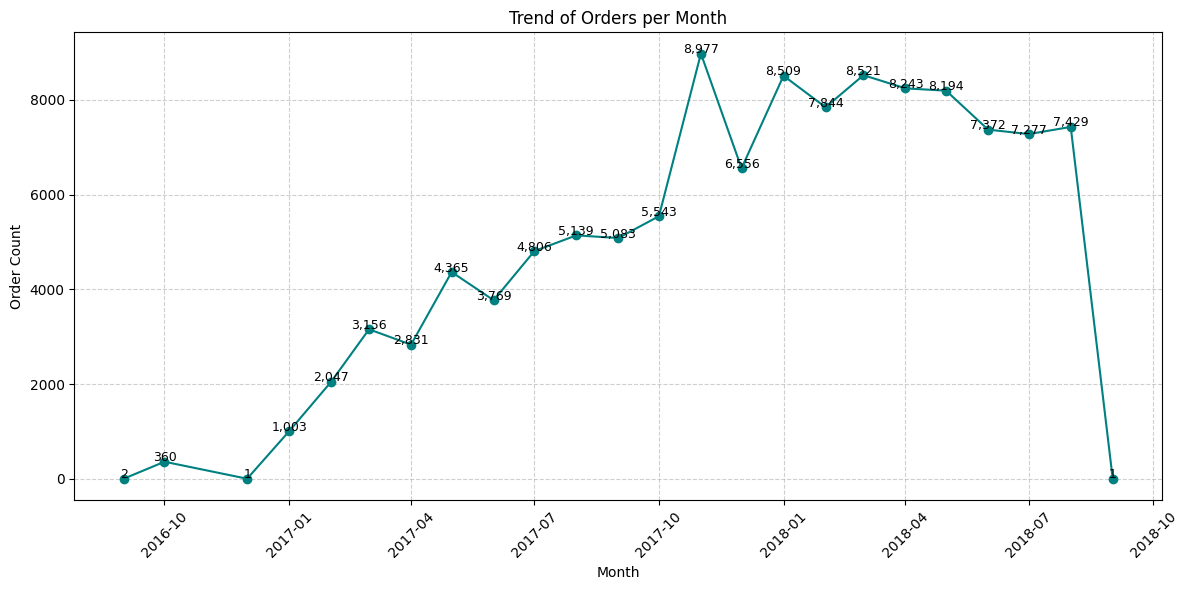

In [45]:
# Konversi kolom order_purchase_timestamp ke datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Menghitung jumlah pesanan per bulan
orders_by_month = (
    df['order_purchase_timestamp']
    .dt.to_period('M')
    .value_counts()
    .sort_index()
)

# Konversi ke DataFrame
orders_by_month_df = orders_by_month.reset_index()
orders_by_month_df.columns = ['Month', 'Order Count']
orders_by_month_df['Month'] = orders_by_month_df['Month'].dt.to_timestamp()

# Visualisasi Line Chart dengan Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(orders_by_month_df['Month'], orders_by_month_df['Order Count'], marker='o', linestyle='-', color='teal')

# Menambahkan detail jumlah pada titik-titik data
for i, row in orders_by_month_df.iterrows():
    plt.text(row['Month'], row['Order Count'] + 10, f"{row['Order Count']:,}", ha='center', fontsize=9)

plt.title('Trend of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 4 :
Kategori produk apa yang paling populer di antara pelanggan, dan bagaimana distribusi 5 kategori teratas dibandingkan dengan kategori lainnya? Bagaimana hasil ini dapat digunakan untuk pengelolaan produk atau strategi pemasaran perusahaan?

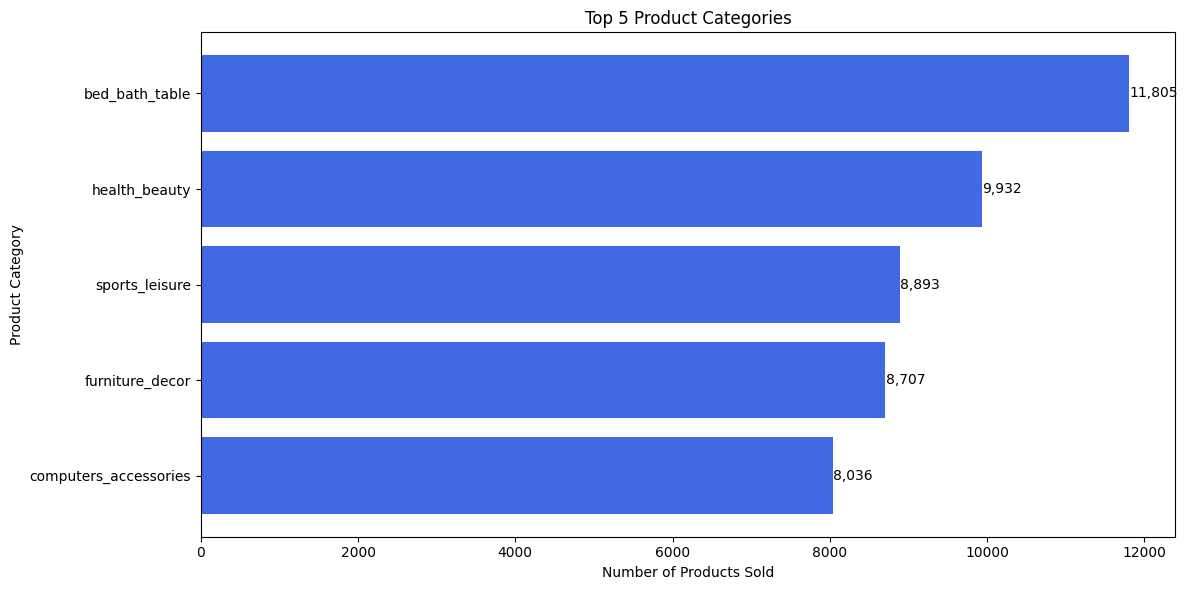

In [46]:
# Visualisasi menggunakan bar chart horizontal
plt.figure(figsize=(12, 6))
bars = plt.barh(top_categories.index, top_categories.values, color='royalblue')

# Menambahkan detail jumlah di dalam chart
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,}', va='center', fontsize=10)

plt.title('Top 5 Product Categories')
plt.xlabel('Number of Products Sold')
plt.ylabel('Product Category')
plt.gca().invert_yaxis()  # Membalikkan urutan untuk ranking
plt.tight_layout()
plt.show()

## Conclusion

##### Conclution pertanyaan 1

- Berdasarkan visualisasi, terlihat bahwa Sao Paulo merupakan kota dengan jumlah pelanggan terbanyak, yaitu 14761 pelanggan, jauh melampaui kota lain. Posisi kedua ditempati oleh Rio de Janeiro dengan 6545 pelanggan, yang juga memiliki jumlah signifikan namun hanya sekitar setengah dari Sao Paulo. Tiga kota lainnya, yaitu Belo Horizonte 2641 pelanggan, Brasilia 2051 pelanggan, dan Curitiba 1447 pelanggan, memiliki kontribusi yang lebih kecil terhadap jumlah pelanggan dibandingkan Sao Paulo dan Rio de Janeiro.

- Insight:
  - Sao Paulo sebagai pusat pelanggan terbesar menunjukkan bahwa kota ini berpotensi menjadi fokus utama strategi pemasaran atau pengembangan layanan perusahaan.
  - Kota dengan jumlah pelanggan lebih kecil, seperti Curitiba, dapat menjadi target untuk pengembangan pasar lebih lanjut.

- Rekomendasi Bisnis:
  - Perusahaan dapat memperkuat layanan dan promosi di Sao Paulo untuk mempertahankan pelanggan yang ada.
  - Investasi lebih besar pada Rio de Janeiro juga dapat dilakukan untuk memaksimalkan potensi pasar di sana.
  - Strategi pemasaran yang lebih agresif dapat diarahkan ke kota dengan jumlah pelanggan yang lebih kecil untuk meningkatkan pertumbuhan pelanggan.

##### Conclution pertanyaan 2

- Kartu Kredit adalah metode pembayaran paling populer, menyumbang mayoritas transaksi.
- Boleto menjadi metode pembayaran kedua terbanyak, dengan kontribusi cukup signifikan.
- Voucher dan Debit Card hanya digunakan oleh sedikit pelanggan.
- Insight:
  - Pelanggan lebih menyukai metode yang cepat dan praktis, seperti kartu kredit.
  Metode pembayaran lain memiliki potensi, namun membutuhkan kemudahan tambahan untuk menarik lebih banyak pengguna.
- Rekomendasi:
  - Optimalkan kartu kredit dengan mempercepat proses otorisasi dan meningkatkan keamanan.
  - Permudah penggunaan boleto, seperti mempersingkat langkah pembayaran.
  - Promosikan metode minor seperti voucher dan debit card untuk mendiversifikasi preferensi pembayaran pelanggan.

##### Conclution pertanyaan 3

- Jumlah pesanan mengalami peningkatan signifikan dari 2016 hingga awal 2018, menunjukkan tren pertumbuhan positif.
- Penurunan tajam terjadi setelah pertengahan 2018.

- Insight:
  - Tidak terlihat pola musiman yang jelas, tetapi pertumbuhan pesanan stabil hingga puncaknya pada awal 2018.
  - Penurunan tajam setelah pertengahan 2018 dapat mengindikasikan perubahan eksternal, seperti kebijakan, kompetitor, atau perubahan pasar.
- Rekomendasi:
  - Analisis penyebab penurunan setelah pertengahan 2018 untuk tindakan korektif.
  - Tingkatkan promosi untuk mempertahankan pertumbuhan, terutama pada bulan dengan pesanan tinggi sebelumnya.
  Optimalkan inventaris untuk mendukung tren peningkatan pesanan di periode awal.

##### Conclution pertanyaan 4

- Kategori produk "bed_bath_table" adalah yang paling populer dengan jumlah penjualan tertinggi, diikuti oleh "health_beauty", "sports_leisure", "bfurniture_decor", dan "computers_accessories".

- Insight :
  - Permintaan produk dalam kategori bed_bath_table jauh lebih tinggi dibandingkan kategori lainnya, menunjukkan potensi besar dalam segmen ini.
  - Perbedaan jumlah penjualan antara kategori menunjukkan variasi preferensi pelanggan yang dapat dimanfaatkan dalam strategi pemasaran.
- Rekomendasi :
  - Optimasi Stok → Pastikan ketersediaan stok yang cukup untuk kategori dengan penjualan tinggi guna menghindari kehabisan barang.
  - Strategi Pemasaran → Fokuskan kampanye iklan dan promosi pada kategori terlaris untuk meningkatkan volume penjualan lebih lanjut.
  - Ekspansi Produk → Lakukan analisis lebih lanjut untuk menambah variasi produk dalam kategori populer agar tetap kompetitif.
  - Segmentasi Pelanggan → Gunakan data ini untuk memahami preferensi pelanggan dan menargetkan promosi yang lebih spesifik.